In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
turbines_df = pd.read_csv('/content/gas_turbines.csv')
turbines_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
turbines_df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [4]:
turbines_df.shape

(15039, 11)

In [5]:
turbines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
turbines_df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [7]:
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from keras.layers import Dense

In [8]:
x = turbines_df.iloc[:,[0,1,2,3,4,5,6,8,9,10]]
y = turbines_df.iloc[:,7]

In [9]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(x)
Y = sc_x.fit_transform(y.values.reshape(-1,1))

In [10]:
Y.shape

(15039, 1)

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=123)

In [12]:
model = Sequential([Dense(50,input_shape=(10,),activation='ReLU')])
model.add(Dense(1, kernel_initializer='normal', activation='linear'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# model.predict(x)
model.compile(optimizer='rmsprop',loss='mean_absolute_error',metrics=['MeanSquaredError'])


In [13]:
history = model.fit(X_train,y_train,epochs=10,batch_size=10)

Epoch 1/10
1204/1204 [==============================] - 3s 2ms/step - loss: 0.1054 - mean_squared_error: 0.0741
Epoch 2/10
1204/1204 [==============================] - 2s 2ms/step - loss: 0.0348 - mean_squared_error: 0.0024
Epoch 3/10
1204/1204 [==============================] - 2s 2ms/step - loss: 0.0330 - mean_squared_error: 0.0022
Epoch 4/10
1204/1204 [==============================] - 2s 1ms/step - loss: 0.0317 - mean_squared_error: 0.0020
Epoch 5/10
1204/1204 [==============================] - 2s 1ms/step - loss: 0.0306 - mean_squared_error: 0.0019
Epoch 6/10
1204/1204 [==============================] - 2s 1ms/step - loss: 0.0298 - mean_squared_error: 0.0018
Epoch 7/10
1204/1204 [==============================] - 2s 1ms/step - loss: 0.0292 - mean_squared_error: 0.0017
Epoch 8/10
1204/1204 [==============================] - 2s 1ms/step - loss: 0.0287 - mean_squared_error: 0.0017
Epoch 9/10
1204/1204 [==============================] - 2s 2ms/step - loss: 0.0284 - mean_squared_error:

Text(0, 0.5, 'MSE')

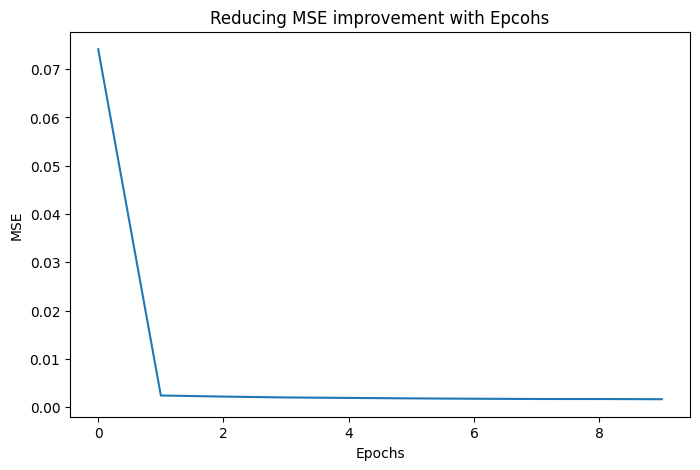

In [21]:
pd.DataFrame(history.history)['mean_squared_error'].plot(figsize=(8,5))
plt.title('Reducing MSE improvement with Epcohs')
plt.xlabel('Epochs')
plt.ylabel('MSE')

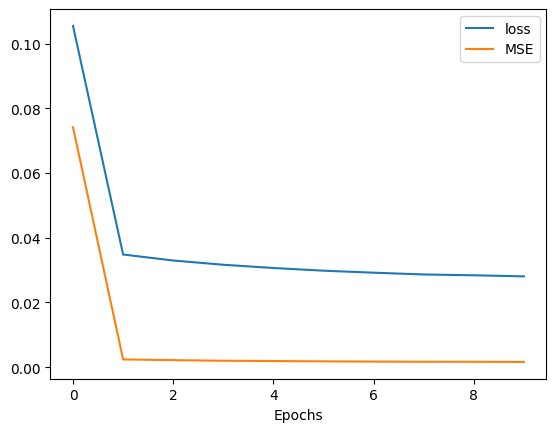

In [24]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mean_squared_error'],label='MSE')
plt.xlabel('Epochs')
plt.legend()

In [14]:
y_pred =  model.predict(X_test)
y_pred

94/94 [==============================] - 0s 1ms/step


array([[-0.02557878],
       [-0.12458173],
       [-0.0196451 ],
       ...,
       [-0.00990111],
       [-1.4999176 ],
       [ 0.10374224]], dtype=float32)

In [17]:
import random as re
y_pred1 = model.predict([[re.randint(20,40) for i in range(0,10)]])
y_pred1

1/1 [==============================] - 0s 58ms/step


array([[9.023184]], dtype=float32)